# K-Nearest Neighbor (KNN) Project
---

_Authors: Carleton Smith; W.P.G.Peterson_


## Project Guide
---
- [Project Overview](#project-overview)  
- [Part 1: Acquire, Explore, and Preprocess Data](#part1)
- [Part 2: Code KNN](#part2)  
    -[KNN in sklearn](#sklearn)
- [Part 3: Interpret Results](#part3)


<a id="project-overview"></a>
## Project Overview
---
#### EXPECTED TIME: 3 HRS  

This project has 3 parts:

- Part 1: Familiarize yourself with the problem and data.
- Part 2: Code a KNN Classifier from scratch, evaluate performance, and compare to Scikit-Learn's implementation.
- Part 3: Interpret results and explain findings.

Throughout this assignment you will:
- Answer simple questions regarding the data.
- Manipulate multiple DataFrames.
- Code functions to:  
    - Calculate Euclidean distance
    - Calculate distance between many pairs of points
    - Implement a majority voting system
    - Combine the above to create a custom KNN algorithm
- Use `KNeighborsClassifier` in `sklearn`  

**Motivation**: KNN is a reasonably simple algorithm that is easy to grasp and can be very effective.

**Objectives**: By the end of this assignment, you will:
- Have a firm understanding of the KNN algorithm.
- Have practiced how to solve a problem using the data science.
- Understand how to translate a mathematical algorithm into effective code.
- Understand common pitfalls when working with distances

**Problem**: Classify the type of activity a person is performing based on measurements collected from a smartphone. The activities include:  
- Walking
- Walking_Upstairs
- Walking_Downstairs
- Sitting
- Standing
- Laying


**Dataset**: For this assignment, we will be using a database from the UC Irvine Machine Learning Repositiory that can be downloaded from the following link:
[_Human Activity Recognition Using Smartphones Data Set_](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).  

A description of the database as provided by the original authors in given below.

---
```
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

For each record it is provided:
======================================

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.
```

Please see the [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) to explore the data files further.

---

<a id="part1"></a>
## Part 1: Acquire, Explore, and Preprocess Data
---

### Import Libraries and Data

In [3]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the training data

In [4]:
FEATURE_NAMES = '../resource/asnlib/publicdata/features.txt'
TRAIN_DATA = '../resource/asnlib/publicdata/X_train.txt'
TRAIN_LABELS = '../resource/asnlib/publicdata/y_train.txt'

In [5]:
# Load the data into a `pandas` DataFrame objects

# read feature names
feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# read in training labels
har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

### Explore the Data

First, we print the first five rows of the training data (`har_train`) to understand what the dataframe looks like.

In [6]:
har_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### Question 1

In [7]:
### GRADED

### Find out how many rows and columns are in har_train
### Assign your answer to the variable ans1 as the tuple (<rows>, <cols>).
### For your reference you may also want to print out the nubmer of rows and columns

### YOUR ANSWER BELOW

ans1 = (har_train.shape[0], har_train.shape[1])

###
### YOUR CODE HERE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we visualize the first 5 rows of the DataFrame of feature names `feats`.

In [9]:
feats.head()

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


Finally, we assign each feature name in `feats` to each column of `har_train` using the `.columns` attribute and we visuaize the first 5 rows.

In [10]:
har_train.columns = feats.iloc[:,0]
har_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### Question 2

In [11]:
### GRADED
### How many "null" values are in the `har_train` dataframe?
### Assign the result as an integer to the variable ans2.

### YOUR ANSWER BELOW

ans2 = har_train.isnull().sum().sum()

###
### YOUR CODE HERE
###


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Below, we plot the correlation of the first 20 features (`har_train.iloc[:, :20])` on a lower triangular matrix using the seaborn library `seaborn`. You can find an example of how to plot a correlation matrix using `seaborn` at https://seaborn.pydata.org/examples/many_pairwise_correlations.html

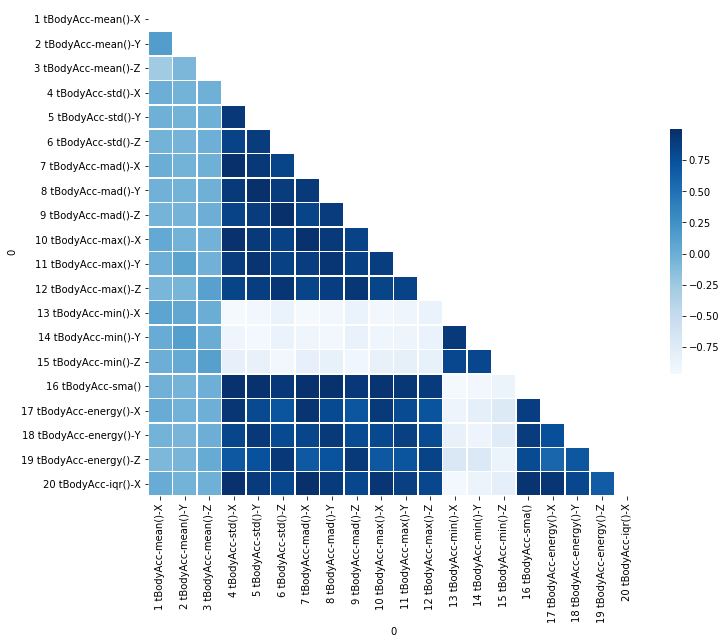

In [13]:
# extract the first 20 features
first_twenty = har_train.iloc[:, :20] 
# compute correlation matrix
corr = first_twenty.corr()  
# make mask
mask = np.zeros_like(corr, dtype=np.bool)  
# mask the upper triangle
mask[np.triu_indices_from(mask)] = True  

# create a figure and a subplot
fig, ax = plt.subplots(figsize=(11, 9))  
# costumizing the color map
# cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(
    corr,
    mask=mask,
    cmap='Blues',
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

#### Question 3

In [14]:
### GRADED
### By looking at the graph above, decide whether the following statement is True or False.
### Some of the 20 features considered are highly correlated, e.g. with correlation >0.5 or < -0.5.
### Assign a boolean value True or False to the variable ans3.

### YOUR ANSWER BELOW


ans3 = True

###
### YOUR CODE HERE
###


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As you know, exploratory data analysis (EDA) is used to develop an idea what the data we are about to work with looks like. In particular, looking for Null values and correlated features are important steps in order to:  

1. See if any features will not be useful in models because of null values.
2. See if any model assumptions are violated by correlated features (such as in linear / logistic regression).

For the next question, we will use the dataframe containing the the target variable (`har_train_labels`).

#### Question 4

In [16]:
### GRADED
### How many times does the majority class appear in our data?
### How many times does the minority class appear in our data?
### Assign int values to to ans_maj and ans_min, respectively.

### YOUR ANSWER BELOW


ans_maj = 1407
ans_min = 986

###
### YOUR CODE HERE
###


In [17]:
x = har_train
y = har_train_labels
type(y)
y.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: label, dtype: int64

In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As an observation, a large imbalance in the distribution of the target variable categories can cause machine learning algorithms to perform differently. In this case, the algorithm can perform well with the majority class and poorly on the minority class.

Below, we use the `.concat()` and the `.groupby()` attributes to compare the statistics within each activity.

In [19]:
X = har_train
y = har_train_labels

In [20]:

# concatenate the target variables
data = pd.concat([X, y], axis=1)
data.shape 

(7352, 562)

In [21]:
# group the data by the 'label' and show descriptive stats
data.groupby('label').agg(['count', 'mean','std','min','max','median']).T.head(20)

label                                 1            2           3            4  \
1 tBodyAcc-mean()-X count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean       0.276260     0.261930    0.288169     0.273449   
                    std        0.050353     0.078029    0.095101     0.041998   
                    min        0.121465    -0.061041   -0.161088    -0.412659   
                    max        0.433256     0.480180    0.617597     0.559135   
                    median     0.274582     0.266666    0.284955     0.277306   
2 tBodyAcc-mean()-Y count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.017768    -0.026647   -0.016370    -0.012143   
                    std        0.020880     0.037038    0.027057     0.032421   
                    min       -0.127407    -0.183885   -0.094826    -0.121073   
                    max        0.071488     0.100904    0.099755     0.324130   
                    median    -0.017867    -0.023000   -0.017714    -0.016457   
3 tBodyAcc-mean()-Z count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.108884    -0.120424   -0.105860    -0.106581   
                    std        0.032436     0.060204    0.050656     0.045323   
                    min       -0.285675    -0.403290   -0.289816    -0.560934   
                    max        0.006195     0.142537    0.091229     0.280939   
                    median    -0.110424    -0.113635   -0.109039    -0.108125   
4 tBodyAcc-std()-X  count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.312641    -0.221072    0.139847    -0.983450   

label                                 5            6  
1 tBodyAcc-mean()-X count   1374.000000  1407.000000  
                    mean       0.279294     0.269191  
                    std        0.020097     0.101541  
                    min        0.111231    -1.000000  
                    max        0.631510     1.000000  
                    median     0.277507     0.276946  
2 tBodyAcc-mean()-Y count   1374.000000  1407.000000  
                    mean      -0.016123    -0.018345  
                    std        0.017846     0.073512  
                    min       -0.116007    -1.000000  
                    max        0.212768     1.000000  
                    median    -0.017097    -0.017364  
3 tBodyAcc-mean()-Z count   1374.000000  1407.000000  
                    mean      -0.107330    -0.107169  
                    std        0.035680     0.089743  
                    min       -0.509645    -1.000000  
                    max        0.267377     1.000000  
                    median    -0.108771    -0.108104  
4 tBodyAcc-std()-X  count   1374.000000  1407.000000  
                    mean      -0.985346    -0.959475

As a final note, EDA should be performed at the beginning of each project and should be tailored to your specific problem to develop and understanding of the data for a particular purpose. Sometimes this could be a time consuming process when the data are large with many features.

Note that the above example shows just a few of the actions yuo can perform for EDA

Having performed EDA, we define a "test" data-set that will help us evaluating out different models.  

The attribute `train_test_split` from the `sklearn.model_selection` module provides an easy way to do this.  

For this exercise we set `test_size=.3` and `random_state=24`.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

#### Question 5

In [23]:
### GRADED 
### Setting `test_size = .3` means:
### 'a') the final 30% of the data is consudered to test the data
### 'b') only observations with value ".3" are considered
### 'c') a random 30% of the data are considered
### 'd') a random 70% of the data are considered
### Assign the letter associated with your choice to ans4 as a string


### YOUR ANSWER BELOW


ans4 = 'c'

###
### YOUR CODE HERE
###


In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="part2"></a>
## Part 2: Code K-Nearest Neighbours (KNN)

Note: The following example was adapted from example 2.1.2 in Chapter 2 of [_Machine Learning in Action_ by Peter Harrington](https://www.manning.com/books/machine-learning-in-action).

Before fitting a model using KNN and the built-in modules of the `sklearn` package, we will code our own version of KNN from scratch.  

As you know, KNN calculates the distance between the value (or a vector) that we want to classify and all other values (or vectors) in the training data-set. Then, the "`k`" nearest neighbors are classified based on their "label" and the majority is given to the predicted value. 

Thus we will need to define a function that accepts the following parameters:

- A single data point to be classified (`input_vector`)
- Training data (`X_train`)   
- Labels for training data (`y_train`)
- Value of `k` (some positive integer)
- Optional: Similarity Metric (Euclidean or Cosine)- This exercise will use [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) for simplicity (`metric`).  


**Function definition:**  
`def my_knn(input_vector, X_train, y_train, k, [metric])`  

**Pseudo Code:**  
```
for every point in our dataset:
    calculate the distance between the current point and input_vector
    sort the distances in increasing order
    take k items with lowest distances from input_vector
    find the majority class among these items
    return the majority class label from the k closest neighbors
```

**Return:**   
- The prediction for `input_vector`  

#### Question 6

In [25]:
### GRADED
### For this exrcise, we will use Euclidean distances.  
### Find the Euclidean distance between the points p1 = (1,2,3,-4,6) and p2 = (10,2,32,-2,0)
### Assign the distance as float to ans5
### YOUR ANSWER BELOW

p1 = (1,2,3,-4,6)
p2 = (10,2,32,-2,0)

p1 = np.array(p1)
p2 = np.array(p2)

ans5 = np.sqrt(np.sum(np.square(p1-p2)))
print(ans5)

###
### YOUR CODE HERE
###


31.016124838541646


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 7

In [27]:
### GRADED
### Define a function called "euclid_dist" that takes, as input
### two points, represented as tuples in the format p1 = (a1, b1,...n1) and p2 = (a2, b2, ...n2).
### Your function should reurtn the the euclidean distance between the two points.
### YOUR ANSWER BELOW

def euclid_dist(p1, p2):
    """
    Calculate the Euclidian Distance between two points
    
    Positional Arguments:
        p1 -- A tuple of n numbers
        p2 -- A tuple of n numbers
    
    Example:
        p1 = (5,5)
        p2 = (0,0)
        p3 = (5,6,7,8,9,10)
        p4 = (1,2,3,4,5,6)
        print(euclid_dist(p1,p2)) #--> 7.0710678118654755
        print(euclid_dist(p3,p4)) #--> 9.797958971132712
    """
    p1 = np.array(p1)
    p2 = np.array(p2)

    return np.sqrt(np.sum(np.square(p1-p2)))

###
### YOUR CODE HERE
###


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Distances with `numpy`

In the KNN function that we will define we will use the library `numpy` to calculate the distance more efficiently.
This can be done via the following code : `np.linalg.norm(p1-p2)`.  

 
Now that we can easily calculate the distances between any two points, we can start building our function.

#### Question 8

In [29]:
### GRADED
### Define a function a function called "all_distances" that takes as input:s
### An observation from a data set.  e.g: har_train.iloc[50,:] and
### The full data set. e.g. har_train.
### Your function should create a <list> or numpy array with the distances between
### that observation point and all points in the full dataset
### Your function should return a list dists with distances sorted from smallest to largest.

### Hints:
### Use `np.linalg.norm()`, as described in above cell.
### The smallest distance should be 0.

### YOUR ANSWER BELOW


def all_distances(test_point, data_set):
    """
    Find and return a list of distances between the "test_point"
    and all the points in "data_set", sorted from smallest to largest.
    
    Positional Arguments:
        test_point -- a Pandas Series corresponding to a row in "data_set"
        data_set -- a Pandas DataFrame
    
    Example:
        test_point = har_train.iloc[50,:]
        data_set = har_train
        
        print(all_distances(test_point, data_set)[:5])
        #--> [0.0, 2.7970187358249854, 2.922792670143521, 2.966555149052483, 3.033982453218797]
    
    """
    
    diff = test_point - data_set
    dists = np.apply_along_axis(np.linalg.norm,1,diff)
    dists = np.sort(dists)
    return list(np.sort(dists))
###
### YOUR CODE HERE
###


In [30]:
test_point = har_train.iloc[50,:]
data_set = har_train
all_distances(test_point, data_set)

[0.0,
 2.7970187358249854,
 2.922792670143521,
 2.966555149052483,
 3.033982453218797,
 3.0702926753670767,
 3.115230666027252,
 3.1227082844574046,
 3.124909324311079,
 3.126327983990909,
 3.15253590778027,
 3.153695321319565,
 3.1927261595634318,
 3.2031245622355424,
 3.2074948147235767,
 3.21145867665848,
 3.2136423185922234,
 3.2369452828796854,
 3.242815757157715,
 3.248910504400516,
 3.2570665670774988,
 3.2603244174840627,
 3.267236183653274,
 3.278531571187629,
 3.2854935183874123,
 3.307856733481075,
 3.321187865315099,
 3.3249385419200195,
 3.339944450293414,
 3.3404302706298656,
 3.3575222301289314,
 3.3805700094465236,
 3.384081513695887,
 3.3905636200403295,
 3.3936625690151185,
 3.393688804651195,
 3.3956173057137686,
 3.4142159761019943,
 3.422533856759488,
 3.4274007676159153,
 3.432827462052344,
 3.4381859316801346,
 3.4404304467190987,
 3.4594978068450066,
 3.469008320055473,
 3.4716620323874756,
 3.487611836266006,
 3.488553580616889,
 3.4888794354624517,
 3.49163488

In [31]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 9 

In [32]:
### GRADED
### Define a function a function called "labels_of_smallest" that takes as inputs:
### two different numpy arrays, the first one corresponding a numeric column and the second 
### one corresponding to a label column.
### Note that the i-th element of the numeric column corresponds to the i-th element of the label column
### The third inputs should be a positive integer n.
### Your function should return a list (or numpy array) `df` of the n smallest labels corresponding to 
### the n smallest values in the numeric array.
### NOTE: Make sure the order of labels corresponds to the order of values.

### Hint: The labels are found in har_train_labels or y
### Hint: `pd.concat()` might be useful for this or subsequent exercisces  
### YOUR ANSWER BELOW

def labels_of_smallest(numeric, labels, n):
    
    """
    Return the n labels corresponding to the n smallest values in the "numeric"
    numpy array.
    
    Positional Arguments:
        numeric -- a numpy array of numbers
        labels -- a numpy array of labels (string or numeric)
            corresponding to the values in "numeric"
        n -- a positive integer
        
    Example:
        numeric = np.array([7,6,5,4,3,2,1])
        labels = np.array(["a","a","b","b","b","a","a"])
        n = 6
        
        print(labels_of_smallest(numeric, labels, n))
        #--> np.array(['a', 'a', 'b', 'b', 'b', 'a'])
    """
    print(labels)
    con = np.concatenate((numeric.reshape(-1,1), labels.reshape(-1,1)), axis=1)
    df = pd.DataFrame(con, columns = ["num","lab"])
    df = df.sort_values(by = 'num')
    return df['lab'][:n].values
    
###
### YOUR CODE HERE
###


In [33]:
numeric = np.array([7,6,5,4,3,2,1])
labels = np.array(["a","a","b","b","b","a","a"])
n = 6
labels_of_smallest(numeric, labels, n)

['a' 'a' 'b' 'b' 'b' 'a' 'a']


array(['a', 'a', 'b', 'b', 'b', 'a'], dtype=object)

In [34]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 10: 

For thins question, look at [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) function and at the attribute `.most_common()`.

In [35]:
### GRADED
from collections import Counter
### Define a function called "label_voting" that takes as input
### a non-empty numpy array of labels as input.
### Your function should return the value (as integer) that appears most frequently in that array
### In the case of of a tie, return the value in the tie that appears first in the array


### YOUR ANSWER BELOW

def label_voting(labels):
    """
    Given a numpy array of labels. Return the label that appears most frequently
    If there is a tie for most frequent, return the label that appears first.
    
    Positional Argument:
        labels -- a numpy array of labels
    
    Example:
        lab1 = np.array([1,2,2,3,3])
        lab2 = np.array(["a","a","b","b","b"])
        
        print(label_voting(lab1)) #--> 2
        print(label_voting(lab2)) #--> "b"
        
    """
###
### YOUR CODE HERE
###
    labels = list(labels)
    c = Counter(labels).most_common()
    return c[0][0]

In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 11
Now it is time to put everything together. In question 6,7, and 8 we defined functions to calculate distances.
In question 9 we defined a function tosort and return n desired labels. Finally, in question 10 we counted the number of "votes."

The next question asks for a KNN modeling function.

In [52]:
### GRADED
### Define a function called "custom_KNN" that takes as inputs
### 1. a single value from  X_test (created above in our `test_train_split`)  
### 2. X_train  
### 3. thne labels y_train
### 4. n - the number of nearest neighbors to poll in making predictions.
### Your function should calculate the Euclidean distance between that X_test-point 
### and every point in X_train and finds the labels from the "n" nearest neighbors 
### ordered from the closest ones to the furthest ones.
### Your function should return  a prediction according to the voting rules outlined 
### in question 10.
### YOUR ANSWER BELOW

def custom_KNN( point, X_train, y_train, n):
    """
    Predict the label for a single point, given training data and a specified
    "n" number of neighbors.
    
    Positional Arguments:
        point -- a pandas Series corresponding to an observation of a point with
             unknown label.
        x_train -- a pandas DataFrame corresponding to the measurements
            of points in a dataset. Assume all values are numeric, and
            observations are in the rows; features in the columns
        y_train -- a pandas Series corresponding to the labels for the observations
            in x_train
    
    Example:
        point = pd.Series([1,2])
        X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
        y_train = pd.Series(["a","a","b"])
        n = 2
        print(custom_KNN(point, X_train, y_train, n)) #--> 'a'
    """
    df = pd.DataFrame()
    dists = np.array(all_distances(point, X_train))
    print(y_train)
    labs = labels_of_smallest(dists, np.array(y_train.values), n)
    return label_voting(labs)
###
### YOUR CODE HERE
###


In [53]:
point = pd.Series([1,2])
X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
y_train = pd.Series(["a","a","b"])
n = 2
custom_KNN(point, X_train, y_train, n)
print(custom_KNN(point, X_train, y_train, n))

0    a
1    a
2    b
dtype: object
['a' 'a' 'b']
0    a
1    a
2    b
dtype: object
['a' 'a' 'b']
a


In [39]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You should now have a functioning KNN classifier assigned to the function `customKNN`.

Let's now see how good our classifier is using `n` = 5.  

The below cell may or may not complete ruNning on Vocareum due to processing constraints. 

**FOR FASTER COMPLETION, TRY COMMENTING OUT THE CELL BELOW**

In [40]:
%%time

# Create New tts
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

# print("Total 'test' observations:", len(X_test))
# print("Classifying every point in X_test would take too long - classify the first 200")
# custom_preds = []
# for i, idx in enumerate(X_test.index[:200]):
   # if i % 100 == 0: print(i)
    # pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, 5)
   # custom_preds.append(pred) """"""

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


<a id = "sklearn"></a>
### KNN in Sklearn

While is useful to learn and see  how predictions are made using K-Nearest Neighbors using our own function, the `sklearn` library has an implementation called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) that will run much faster than our home-built version.  

In [41]:
%%time
# Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Instantiate classifier
# NB: Default distance is Euclidean
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit model with training data
knn.fit(X_train, y_train)

# Create predictions for first 200 test observations
# # (As was done above with customKNN)
skpreds = knn.predict(X_test[:200])

print("sklearn prediction performance")
print(classification_report(y_test[:200], skpreds))


### The below lines of code will compare the performance of your home-built classification with
### The sklearn predictions -- if all the cells above were run sucessfully, you should see identical scores

print("\nHome-Built prediction performance")
print(classification_report(y_test[:200], custom_preds))


### The below lines of code will explicitly compare predictions:
### "differences" should == 0!

### NB: Commenting/uncommenting multiple lines in Jupyter can be accomplished with:
### <ctrl-/> on windows and <cmd-/> on mac
differences = 0
for cust, sk in zip(custom_preds, skpreds):
    if cust != sk:
        differences +=1
print("Total Differences:", differences)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 5

#### Practice with `sklearn`:  

In the questions below, we will ask you to create a new test/train split, and fit a new KNN model using `sklearn`.  

All of the basic steps for KNN have already been performed above. Feel free to reference.

In [42]:
# Ensure Data is consistent

# read feature names
feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# read in training labels, and clean them.
har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None)
clean_features = [feat[0].split(' ')[1] for feat in feats.values]
har_train.columns = clean_features

har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None)
har_train_labels.columns = ['label']
y = har_train_labels.loc[:, 'label']

#### Question 12

In [43]:
### GRADED
### Suppose you want to make a new test-train-split on our data such that
### the labels should be found in "y" and observations should be found in `har_train`.
### Additionally, when splitting, suppose we want assign the output from the split to 
### X_train2, X_test2, y_train2, and y_test2 and we want set test_size equal to .4 
### and the random_state to 1738.
### Which of the following would accomplish that task?

### 'a') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, test_size = .4, random_state = 1738)
### 'b') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, train_size = .4, random_state = 1738)
### 'c') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, .4, 1738)
### 'd') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, t_size = .4, rs = 1738)

### Assign the letter associated with you choice as string to ans12
### YOUR ANSWER BELOW

ans12 = 'a'
###
### YOUR CODE HERE
###


In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Building a model using sklearn is just as easy as those last two steps! As long as your data is in the right format, once you make your train/test split, the syntax for fitting pretty much any of the models in `sklearn` is about the same.   

<a id="part3"></a>
## Part 3: Interpret Results

To interpret the results we will be looking at the trade-off between bias and variance as we change our `n_neighbors`. In many cases, false negatives are more costly and false positives. As such we will be looking primarily at the change in recall as we build a number of different models.  

Note: The code below takes some time to run.

In [45]:
%%time
from sklearn.metrics import recall_score

### Calculating Recal scores for multiple "n-neighbors"
recall_scores = {}
for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,50,75,100]:
     knn = KNeighborsClassifier(n_neighbors=n)
     knn.fit(X_train, y_train)
     recall_scores[n] = recall_score(y_test, knn.predict(X_test), average = None)
    
### Put recall scores into DataFrame
scores_df = pd.DataFrame(recall_scores).T
scores_df.columns = [str(i) for i in range(1,7)]
scores_df.index = scores_df.index.astype(str)

### Create plot of recall scores
plt.figure(figsize = (10,10))
for col in scores_df:
     if col != 'n_neighbors':
        plt.plot(scores_df[col], label = col)
    
plt.ylabel(" Recall Score", fontsize = 12)
plt.xlabel("n_neighbors (NB: not an interval scale)", fontsize = 12)
plt.legend(title = "activity");

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 561 while Y.shape[1] == 2

#### Question 13

In [46]:
### GRADED
### Looking at the recall scores above, as n_neighbors trends towards 100 do we see in increase in:
### 'a') bias
### 'b') variance

### Assign the letter associated with your choice as a string to ans14
### YOUR ANSWER BELOW

ans13 = 'a'

###
### YOUR CODE HERE
###


In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 14

In [48]:
### GRADED
### Looking at the recall scores above, does it look like the better KNN models have:
### 'a') n_neighbors >= 15
### 'b') n_neigbors < 15

### Assign the letter associated with your shoice as a string to ans15
### YOUR ANSWER BELOW

ans14 = 'b'

###
### YOUR CODE HERE
###


In [49]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 15

In [50]:
### GRADED
### What might explain the oscillations of recall in activities 4 and 6?

### 'a') calculation of Euclidean Distance
### 'b') Use of Entropy (information gain) for splitting
### 'c') tie-breaking/voting proceedures
### 'd') Simply a feature of KNN models: unavoidable
### Assign the letter associated with your choice as a string to ans16
### YOUR ANSWER BELOW

ans15 = 'c'

###
### YOUR CODE HERE
###


In [51]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
